   patients_ahead  avg_service_time  patient_priority  waiting_time
0              17          9.084202                 2     78.890485
1               9         19.027940                 7     25.154958
2              16         26.589975                 1    424.053724
3              18         18.412714                10     36.743357
4               7         29.151222                 4     54.167536


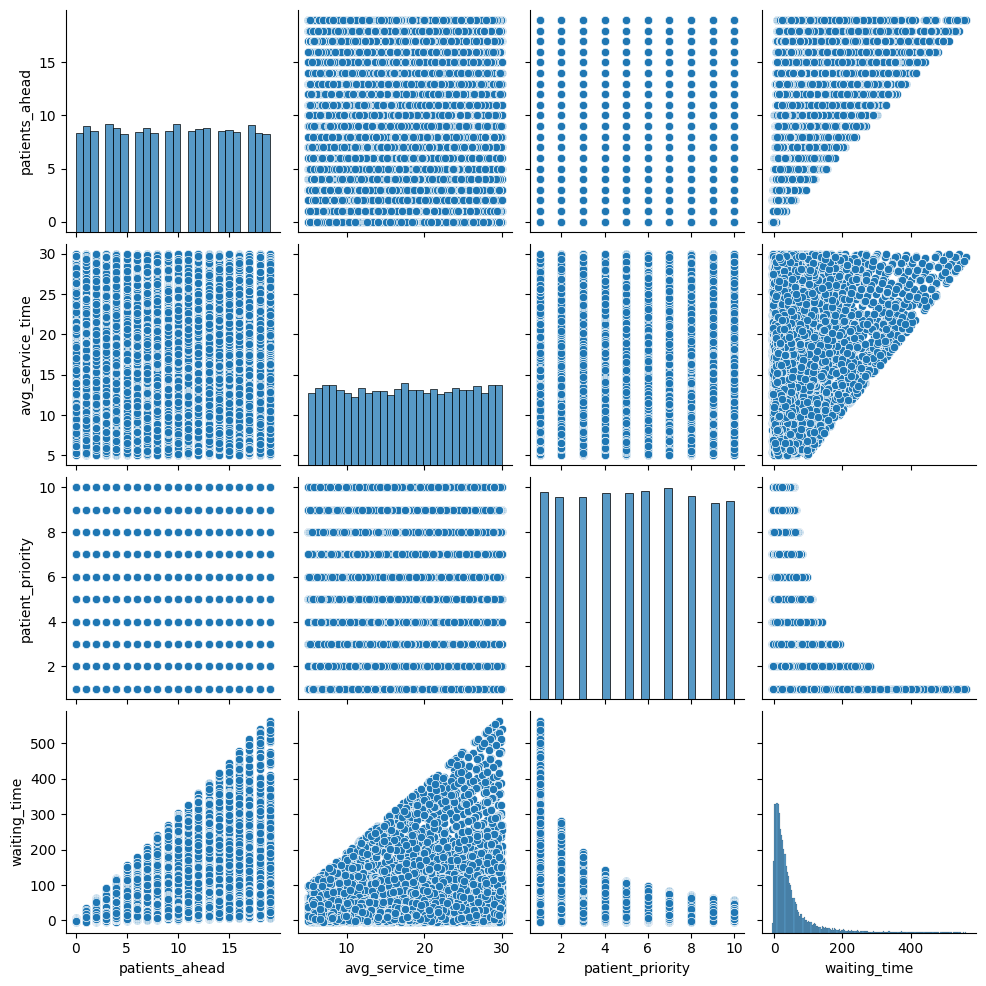

Mean Absolute Error (MAE): 2.00 minutes
Mean Squared Error (MSE): 6.38 minutes^2
Root Mean Squared Error (RMSE): 2.53 minutes


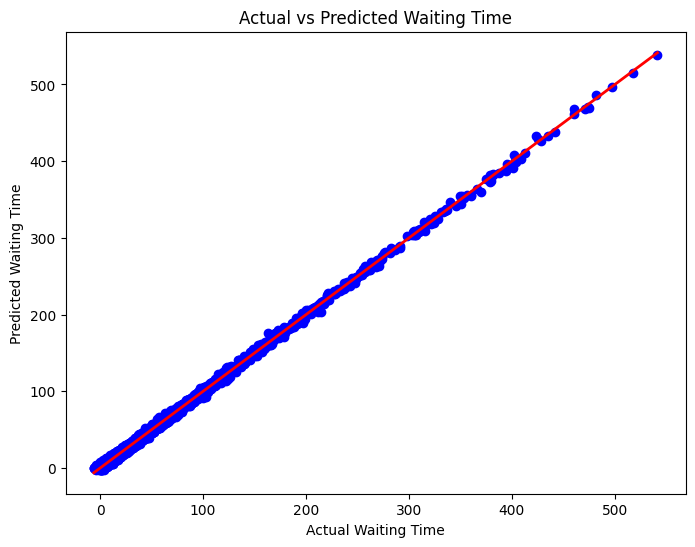


Fine-Tuned Model Performance:
Mean Absolute Error (MAE): 2.24 minutes
Mean Squared Error (MSE): 8.65 minutes^2
Root Mean Squared Error (RMSE): 2.94 minutes


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('large_dummy_patient_data.csv')  # Make sure this points to your actual dataset

print(df.head())

#To verify with graphs
sns.pairplot(df)
plt.show()

#Data to train the model
X = df[['patients_ahead', 'avg_service_time', 'patient_priority']]  # Replace these column names if necessary
y = df['waiting_time']

#splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Training the random forest regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)


rf_model.fit(X_train, y_train)


y_pred = rf_model.predict(X_test)

#Predicting the errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f} minutes")
print(f"Mean Squared Error (MSE): {mse:.2f} minutes^2")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f} minutes")


plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Waiting Time')
plt.ylabel('Predicted Waiting Time')
plt.title('Actual vs Predicted Waiting Time')
plt.show()

#fine-tuning the model
tuned_rf_model = RandomForestRegressor(
    n_estimators=150,        # increase number of trees
    max_depth=10,            # control the depth of trees
    min_samples_split=5,     # control the minimum samples to split a node
    random_state=42
)


tuned_rf_model.fit(X_train, y_train)

tuned_y_pred = tuned_rf_model.predict(X_test)

tuned_mae = mean_absolute_error(y_test, tuned_y_pred)
tuned_mse = mean_squared_error(y_test, tuned_y_pred)
tuned_rmse = np.sqrt(tuned_mse)

print(f"\nFine-Tuned Model Performance:")
print(f"Mean Absolute Error (MAE): {tuned_mae:.2f} minutes")
print(f"Mean Squared Error (MSE): {tuned_mse:.2f} minutes^2")
print(f"Root Mean Squared Error (RMSE): {tuned_rmse:.2f} minutes")


Patient with 10 patients ahead, average service time 15.0 minutes, and priority 3 has a predicted waiting time of 49.72 minutes.
Patient with 25 patients ahead, average service time 12.5 minutes, and priority 7 has a predicted waiting time of 49.29 minutes.
Patient with 5 patients ahead, average service time 8.0 minutes, and priority 9 has a predicted waiting time of 4.38 minutes.
Patient with 18 patients ahead, average service time 20.0 minutes, and priority 2 has a predicted waiting time of 137.77 minutes.
Patient with 30 patients ahead, average service time 10.0 minutes, and priority 5 has a predicted waiting time of 54.18 minutes.
Patient with 3 patients ahead, average service time 25.0 minutes, and priority 8 has a predicted waiting time of 6.77 minutes.
Patient with 40 patients ahead, average service time 9.0 minutes, and priority 4 has a predicted waiting time of 76.39 minutes.
Patient with 12 patients ahead, average service time 18.0 minutes, and priority 6 has a predicted wait

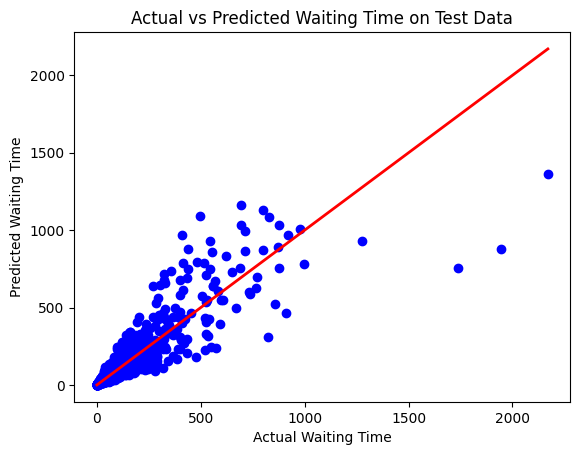

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt


df = pd.read_csv('patient_queue_data_large.csv')

#Data to train the model
X = df[['patients_ahead', 'avg_service_time', 'patient_priority']]
y = df['waiting_time']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#training the model
rf_model.fit(X_train, y_train)

#Function to predict waiting time for a new patient
def predict_waiting_time(patients_ahead, avg_service_time, patient_priority):
    # Create a DataFrame for the new patient input
    new_data = pd.DataFrame({
        'patients_ahead': [patients_ahead],
        'avg_service_time': [avg_service_time],
        'patient_priority': [patient_priority]
    })


    predicted_waiting_time = rf_model.predict(new_data)

    return predicted_waiting_time[0]


#dummy data
new_patients = [
    {'patients_ahead': 10, 'avg_service_time': 15.0, 'patient_priority': 3},
    {'patients_ahead': 25, 'avg_service_time': 12.5, 'patient_priority': 7},
    {'patients_ahead': 5,  'avg_service_time': 8.0,  'patient_priority': 9},
    {'patients_ahead': 18, 'avg_service_time': 20.0, 'patient_priority': 2},
    {'patients_ahead': 30, 'avg_service_time': 10.0, 'patient_priority': 5},
    {'patients_ahead': 3,  'avg_service_time': 25.0, 'patient_priority': 8},
    {'patients_ahead': 40, 'avg_service_time': 9.0,  'patient_priority': 4},
    {'patients_ahead': 12, 'avg_service_time': 18.0, 'patient_priority': 6},
    {'patients_ahead': 0,  'avg_service_time': 7.0,  'patient_priority': 10},
    {'patients_ahead': 7,  'avg_service_time': 16.0, 'patient_priority': 1}
]

#predicting the wait time
for patient in new_patients:
    patients_ahead = patient['patients_ahead']
    avg_service_time = patient['avg_service_time']
    patient_priority = patient['patient_priority']

    predicted_time = predict_waiting_time(patients_ahead, avg_service_time, patient_priority)

    print(f"Patient with {patients_ahead} patients ahead, average service time {avg_service_time} minutes, "
          f"and priority {patient_priority} has a predicted waiting time of {predicted_time:.2f} minutes.")


y_test_pred = rf_model.predict(X_test)
plt.scatter(y_test, y_test_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', lw=2)
plt.xlabel('Actual Waiting Time')
plt.ylabel('Predicted Waiting Time')
plt.title('Actual vs Predicted Waiting Time on Test Data')
plt.show()
